# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [7]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [8]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    total_loss = 0                                 #sum of squared loss across all points
    for i in range(len(Y)):                        #iterate through points
        total_loss += (Y[i] - np.dot(w, X[i]))**2  #loss on single point
    return total_loss
    

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    return -2 * (y - np.dot(w, x)) * x
 
    
def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    losses = np.zeros(N_epochs)             #array of losses from all iterations
    w = w_start
    
    for i in range(N_epochs):           #iterate for set number of epochs
        losses[i] = loss(X, Y, w)       #calculate the loss for the iteration 

        perm = list(range(len(Y)))      #indices of all points
        np.random.permutation(perm)     #shuffle order that points are added in
        
        for p in perm:                  #compute gradient at each point and sum
            x = X[p]
            y = Y[p]
            
            w -= eta * gradient(x, y, w)   #gradient summed across all points
            

    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [9]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in sgd_data.csv and run SGD using the given parameters; print out the final weights.

In [43]:
raw_data = load_data("sgd_data.csv")
n = len(raw_data)
X = np.zeros((n, len(raw_data[0])))   #array for holding X; include space for x0
Y = np.zeros(n)                       #array for Y values

for i in range(n):                    #reformat into X and Y arrays
    X[i][0] = 1
    X[i][1:5] = raw_data[i][:4]
    Y[i] = raw_data[i][4]
    
#parameters for SGD
eta = np.e**-15                       #learning rate eta
w = [0.001, 0.001, 0.001, 0.001]      #weight vector
b = 0.001                             #bias
w_start = [b] + w                   #modify weight vector to include bias
num_epochs = 800                      #epochs

final_w, losses = SGD(X, Y, w_start, eta, num_epochs)

#report final weight
print("weights: ", final_w[1:])
print("bias: ", final_w[0])

    


weights:  [ -5.94229011   3.94369494 -11.72402388   8.78549375]
bias:  -0.227205913368


## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

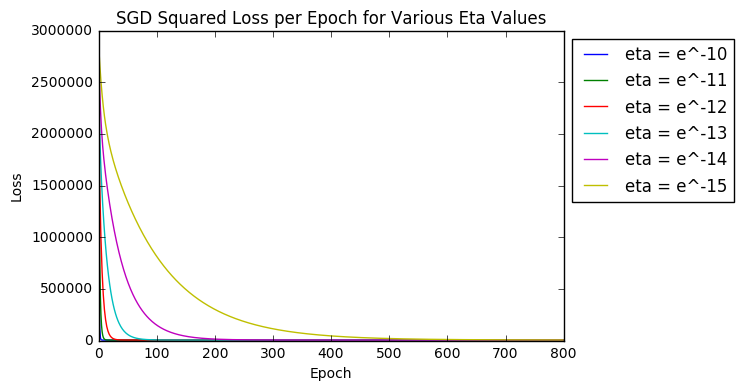

In [11]:

raw_data = load_data("sgd_data.csv")
n = len(raw_data)
X = np.zeros((n, len(raw_data[0])))   #array for holding X; include space for x0
Y = np.zeros(n)                       #array for Y values

for i in range(n):                    #reformat into X and Y arrays
    X[i][0] = 1
    X[i][1:5] = raw_data[i][:4]
    Y[i] = raw_data[i][4]
    
#parameters for SGD
etas = [np.e ** -10, np.e ** -11, np.e ** -12, np.e ** -13, np.e ** -14, np.e ** -15]
ln_eta = [-10, -11, -12, -13, -14, -15]
w = [0.001, 0.001, 0.001, 0.001]      #weight vector
b = 0.001                             #bias
w_start = [b] + w                   #modify weight vector to include bias
num_epochs = 800                      #epochs


legend_handles = []
series_names = []

plt.close('all')
plt.figure()

for i in range(len(etas)):
    _, losses = SGD(X, Y, w_start, etas[i], num_epochs)
    name = 'eta = e^' + str(ln_eta[i])
    data_series, = plt.plot(losses, label=name)
    legend_handles.append(data_series)
    series_names.append(name)

    
plt.legend(legend_handles, series_names, loc = "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Squared Loss per Epoch for Various Eta Values')
plt.savefig("4g")
plt.show()

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [42]:
raw_data = load_data("sgd_data.csv")
n = len(raw_data)
X = np.zeros((n, len(raw_data[0])))   #array for holding X; include space for x0
Y = np.zeros(n)                       #array for Y values

for i in range(n):                    #reformat into X and Y arrays
    X[i][0] = 1
    X[i][1:5] = raw_data[i][:4]
    Y[i] = raw_data[i][4]
    
term_1 = np.zeros((5, 5))
term_2 = np.zeros(len(X[0]))
for i in range(n):
    #print(X[i])
    x = X[i].reshape((1,5))
    #print(x)
    term_1 += np.dot(np.transpose(x), x)
    term_2 += X[i] * Y[i]
    #print(term_1)
    #print(term_2)
inv = np.linalg.inv(term_1)
w = np.dot(np.linalg.inv(term_1), term_2)
#report final weight
print("weights: ", w[1:])
print("bias: ", w[0])

weights:  [ -5.99157048   4.01509955 -11.93325972   8.99061096]
bias:  -0.316442513271
